<a href="https://colab.research.google.com/github/1Jigeesha/Deep-Learning-projects/blob/main/Mini_project_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title :An Application to detect emotion of a person based on their Whatsapp status**

### **1 Importing the Required Libraries**

In [ ]:
!pip install keras 
!sudo pip install h5py

In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt        #Visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

**1.1.0 Reading the dataset and displaying the first 5 rows**

In [ ]:
dataset = pd.read_csv("Whatsapp_Data.csv")
dataset.head()

,Label,Time,Data,Sentiment
0,1,10.35pm,Spend eighty percent of your time focusing on ...,1.0
1,2,11.01am,Sometimes sitting alone remove sadness.,0.0
2,3,03.12pm,Happiness is the by-product of a goal.,1.0
3,4,06.06pm,It’s easy to cry when you realize that everyon...,0.0
4,5,12.03am,THIS is a bad day in my life.,0.0


**1.1.1 Printing the last 5 rows of the dataset**

In [ ]:
dataset.tail()

,Label,Time,Data,Sentiment
995,996,1.13pm,"Whether it is anger, frustration, jealousy or ...",1.0
996,997,9.08pm,Sometimes it’t not the song that makes you emo...,0.0
997,998,12.03am,Outward beautification needs a soul happiness ...,1.0
998,999,11.11pm,"I take words very seriously, and it breaks my ...",0.0
999,1000,NaN,NaN,NaN


### **2. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

**2.1.0 Displaying datatype of each column and also display the non-null row**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      1000 non-null   int64  
 1   Time       999 non-null    object 
 2   Data       999 non-null    object 
 3   Sentiment  999 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB



**Observation**: We can find that only the Label column has 1000 records where remainining columns have 999 records

**2.1.1 Finding the Number of +ve and -ve**

In [ ]:
dataset['Sentiment'].value_counts()

1.0    521
0.0    478
Name: Sentiment, dtype: int64

**2.1.2 Visualization of Sentiment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


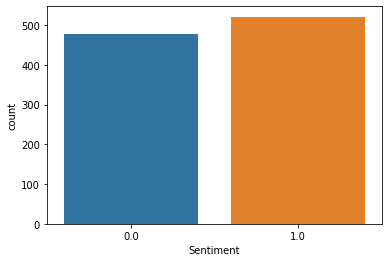

In [ ]:
sns.countplot(dataset['Sentiment'])

**Observation:**  There are 505 positive sentiments and 494 negative sentiments

**2.1.3 Dropping the Null values**

In [ ]:
dataset= dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      999 non-null    int64  
 1   Time       999 non-null    object 
 2   Data       999 non-null    object 
 3   Sentiment  999 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ KB


**Observation:** There are no null values in the dataset

### **3 Feature Extraction**

**3.1.0 Spliting the dataset columns**

In [ ]:
X=dataset.drop("Sentiment",axis=1)
y=dataset["Sentiment"]

**Observation**: The data columns other then Sentiment column is taken into X and Sentiment column in y

**3.1.1 Displaying the Shape of x and y**

In [ ]:
print(" The shape of X is:", X.shape,"\n","The shape of y is: ", y.shape)

 The shape of X is: (999, 3) 
 The shape of y is:  (999,)


**3.1.2 Declaring the size of text and creating a copy of x a**

In [ ]:
voc_size=5000
messages=X.copy()
messages.get('Data')
messages

,Label,Time,Data
0,1,10.35pm,Spend eighty percent of your time focusing on ...
1,2,11.01am,Sometimes sitting alone remove sadness.
2,3,03.12pm,Happiness is the by-product of a goal.
3,4,06.06pm,It’s easy to cry when you realize that everyon...
4,5,12.03am,THIS is a bad day in my life.
...,...,...,...
994,995,12.12pm,Valuing the joy and merit of others will lead ...
995,996,1.13pm,"Whether it is anger, frustration, jealousy or ..."
996,997,9.08pm,Sometimes it’t not the song that makes you emo...
997,998,12.03am,Outward beautification needs a soul happiness ...


### **4. Data Preprocessing**

In [ ]:
import nltk
## re -- regular expression
import re
from nltk.corpus import stopwords

**4.1.0 Dowloading the stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**4.1.1 Data preprocessing using PorterStemmer**

In [ ]:
corpus=[]
for i in range(0,len(messages)):
  #print(i)
  review = re.sub('[^a-zA-Z0-9]',' ',messages["Data"][i])
  review= review.lower()
  corpus.append(review)
corpus

['spend eighty percent of your time focusing on the opportunities of tomorrow rather than the problems of yesterday ',
 'sometimes sitting alone remove sadness ',
 'happiness is the by product of a goal ',
 'it s easy to cry when you realize that everyone you love will reject you or die  ',
 'this is a bad day in my life ',
 'happy days is my favourite movie ',
 'you killed what was left of the good in me ',
 ' the heart dies a slow death  shedding each hope like leaves until one day there are none  no hopes  nothing remains',
 'our marriage is like a workshop  i work and my wife shops ',
 'happiness is a gift and the trick is not to expect it  but to delight in it when it comes ',
 'it s sad to know i m done  but looking back  i ve got a lot of great memories  ',
 'we must accept finite disappointment  but never lose infinite hope ',
 'failure is the condiment that gives success its flavor ',
 'every day is a new day  and you ll never be able to find happiness if you don t move on ',


**4.1.2 Importing the required modules**

In [ ]:
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout

from keras.models import model_from_json


**4.1.3 Encoding the text using OneHot**

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3109,
  3560,
  3232,
  4151,
  2485,
  1731,
  772,
  3437,
  2393,
  3272,
  4151,
  3212,
  378,
  2062,
  2393,
  2900,
  4151,
  1097],
 [445, 202, 4450, 4501, 2219],
 [675, 4276, 2393, 4593, 2609, 4151, 145, 1542],
 [4008,
  2134,
  2013,
  1649,
  2262,
  4154,
  4395,
  4603,
  3340,
  1605,
  4395,
  220,
  885,
  1760,
  4395,
  1353,
  3549],
 [4637, 4276, 145, 3478, 947, 2696, 3326, 302],
 [3817, 2246, 4276, 3326, 3625, 2479],
 [4395, 900, 117, 2310, 28, 4151, 2393, 1049, 2696, 2418],
 [2393,
  4124,
  2823,
  145,
  4853,
  2579,
  119,
  2197,
  4046,
  4719,
  1983,
  1444,
  1574,
  947,
  3905,
  3296,
  4450,
  3616,
  60,
  14,
  4959],
 [567, 2560, 4276, 4719, 145, 3162, 2484, 1841, 1628, 3326, 608, 1910],
 [675,
  4276,
  145,
  4322,
  1628,
  2393,
  74,
  4276,
  967,
  1649,
  1350,
  4008,
  3303,
  1649,
  439,
  2696,
  4008,
  4154,
  4008,
  1595],
 [4008,
  2134,
  4991,
  1649,
  1624,
  2484,
  3858,
  4257,
  3303,
  442,
  3101,
  2484,
  4069,
  35

**4.1.4 Padding the encoding**

In [ ]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2900 4151 1097]
 [   0    0    0 ... 4450 4501 2219]
 [   0    0    0 ... 4151  145 1542]
 ...
 [   0    0    0 ... 4395 3182 4008]
 [   0    0    0 ... 4725 1649 2710]
 [   0    0    0 ...  117 4997 4927]]


**4.1.5 Displaying the embedded coding for single record**

In [ ]:
print(messages['Data'][0],"\n\n ","The Embedded coding is:\n ", embedded_docs[1])


Spend eighty percent of your time focusing on the opportunities of tomorrow rather than the problems of yesterday. 

  The Embedded coding is:
  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  445  202 4450 4501 2219]


**5. Model Building**

In [ ]:

embedding_vector_features=40

model=Sequential()

model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model.add(Dropout(0.3))

model.add(LSTM(100))

model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


**Observation:** Using the **Sigmoid function** we hav build the model in a **sequential** manner by using the "**Binary Crossentropy**"

**5.1.1 Fitting the embedded values into x and y**

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
print("The shape of x is", X_final.shape,"The shape of y is",y_final.shape)

The shape of x is (999, 50) The shape of y is (999,)


**5.1.2 Spliting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

**5.2.1 Model Fitting**

In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
11/11 [==============================] - 3s 113ms/step - loss: 0.6913 - accuracy: 0.5202 - val_loss: 0.6892 - val_accuracy: 0.5121
Epoch 2/100
11/11 [==============================] - 1s 70ms/step - loss: 0.6859 - accuracy: 0.5262 - val_loss: 0.6819 - val_accuracy: 0.5242
Epoch 3/100
11/11 [==============================] - 1s 69ms/step - loss: 0.6661 - accuracy: 0.6487 - val_loss: 0.6560 - val_accuracy: 0.6333
Epoch 4/100
11/11 [==============================] - 1s 71ms/step - loss: 0.6009 - accuracy: 0.7280 - val_loss: 0.5938 - val_accuracy: 0.7394
Epoch 5/100
11/11 [==============================] - 1s 70ms/step - loss: 0.5097 - accuracy: 0.8102 - val_loss: 0.5300 - val_accuracy: 0.7273
Epoch 6/100
11/11 [==============================] - 1s 69ms/step - loss: 0.3976 - accuracy: 0.8191 - val_loss: 0.4875 - val_accuracy: 0.7727
Epoch 7/100
11/11 [==============================] - 1s 70ms/step - loss: 0.3192 - accuracy: 0.8939 - val_loss: 0.4824 - val_accuracy: 0.7879
Epoch

**Observation: The model has been run for 20 epochs for better model building**

**5.2.2 Finding the Accuracies**

In [ ]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 64)
print("score: %.2f" % (score))
print("The accuracy model training is: %.2f" % (acc*100))


6/6 - 0s - loss: 1.4140 - accuracy: 0.7667
score: 1.41
The accuracy model training is: 76.67


In [ ]:
#@title
model.save('model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
#@title
from keras.models import load_model
model=load_model('model.h5')
print("model loaded")

model loaded


**5.2.3 Predicting the training of test dataset**

In [ ]:
y_pred=model.predict_classes(X_test)
y_pred


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

**5.3.1 Importing the analysis libraries**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

**5.3.2 Confusion matrix and visualization**

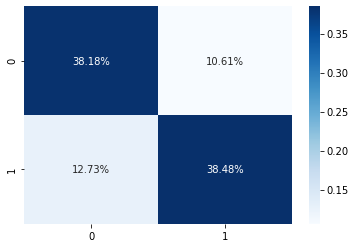

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

**Observation**: We can find that the False Negative are 10.30%. The model might perform better.

**5.3.3 Classification report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       161
         1.0       0.78      0.75      0.77       169

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



**Observation**: We can find that the model as an accuracy of 80%. The model will predict the best results

### **6. User Engagement**

In [ ]:
import math
text = input("Enter the string: ")
text_one_hot=[one_hot(words,voc_size)for words in text] 
#print(text_one_hot)
res = [ele for ele in text_one_hot if ele != []]
  
text_new_one_hot = list(res)
#print ("List after empty list removal : " + text_new_one_hot)



own_pred = model.predict([text_new_one_hot])
result = own_pred[0]
#print("Predicted Score = {}".format(result))

if(result<0.5):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Enter the string: They felt so sad after listening the news
Negative Sentiment


In [ ]:
import math
text = input("Enter the string: ")
text_one_hot=[one_hot(words,voc_size)for words in text] 
#print(text_one_hot)
res = [ele for ele in text_one_hot if ele != []]
  
text_new_one_hot = list(res)
#print ("List after empty list removal : " + text_new_one_hot)



own_pred = model.predict([text_new_one_hot])
result = own_pred[0]
#print("Predicted Score = {}".format(result))

if(result<0.5):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Enter the string: We enjoyed alot today at the beach
Positive Sentiment


**---OCR code---**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
path='image.png'
#custom_config = r'-l grc+tha+eng --psm 6'
#info_text = pytesseract.image_to_string(Image.open(path), config=custom_config)



info_text = pytesseract.image_to_string(Image.open(path))
print(info_text)

\

THE WAY
WE TREAT
PEOPLE WE
DISAGREE WITH
THE MOST ISA
REPORT CARD
ON WHAT WE VE
LEARNED
ABOUT LOVE.

 

